# Find S 

In [1]:
data = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes'],
    ['Rainy', 'Warm', 'High', 'Weak', 'Cool', 'Change', 'No'],
    ['Sunny', 'Cold', 'Normal', 'Strong', 'Warm', 'Same', 'No'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Warm', 'Same', 'Yes'],
    ['Rainy', 'Cold', 'Normal', 'Strong', 'Cool', 'Change', 'No'],
    ['Sunny', 'Warm', 'Normal', 'Weak', 'Warm', 'Same', 'Yes'],
    ['Rainy', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'No'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Cloudy', 'Warm', 'Normal', 'Strong', 'Cool', 'Same', 'No'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Warm', 'Change', 'Yes']
]


def finds(data):
    hypo = []
    for example in data:
        if example[-1] == 'Yes':
            hypo = example[:-1]
            break

    for example in data:
        if example[-1] == 'Yes':
            for i in range(len(hypo)):
                if hypo[i] != example[i]:
                    hypo[i] = '?'

    print(hypo)                 

finds(data)                    

['Sunny', 'Warm', '?', '?', '?', '?']


# Candidate Elimination

In [7]:
concepts = [
    ['sunny', 'warm', 'normal', 'strong', 'warm', 'same'],
    ['sunny', 'warm', 'high', 'strong', 'warm', 'same'],
    ['rainy', 'cold', 'high', 'strong', 'warm', 'change'],
    ['sunny', 'warm', 'high', 'strong', 'cool', 'change']
]

# Target values
target = [True, True, False, True]
def show(s,g,i):
    print(f"Iteration:{i}")
    print(f"S[{i}]:",s)
    print(f"G[{i}]:",g)


def cand(concepts,target):
    sh= concepts[0][:]
    gh = [['?' for _ in range(len(concepts[0]))]]

    show(sh,gh,0)
    for i in range(len(concepts)):
        
        example=concepts[i][:]
        if target[i]:
            for j in range(len(example)):
                if example[j] != sh[j]:
                    sh[j] = "?"
            
            new_gh = []

            for h in gh:
                keep =  True
                for j in range(len(h)):
                    if h[j] == '?' or h[j] == sh[j]:
                        keep = True
                    else:
                        keep = False
                        break
                if keep:
                    new_gh.append(h)

            gh = new_gh
        
        else:
            new_gh = []
            for h in gh:
                for j in range(len(h)):
                    if sh[j]!='?' and sh[j] != example[j]:
                        new_h = h[:]
                        new_h[j] = sh[j]
                        new_gh.append(new_h)

            gh = new_gh

        show(sh,gh,i+1)    



cand(concepts,target)


Iteration:0
S[0]: ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
G[0]: [['?', '?', '?', '?', '?', '?']]
Iteration:1
S[1]: ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
G[1]: [['?', '?', '?', '?', '?', '?']]
Iteration:2
S[2]: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G[2]: [['?', '?', '?', '?', '?', '?']]
Iteration:3
S[3]: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G[3]: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
Iteration:4
S[4]: ['sunny', 'warm', '?', 'strong', '?', '?']
G[4]: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


# Lowess 

Estimated tip for a total bill of 17 is approximately ₹2.70


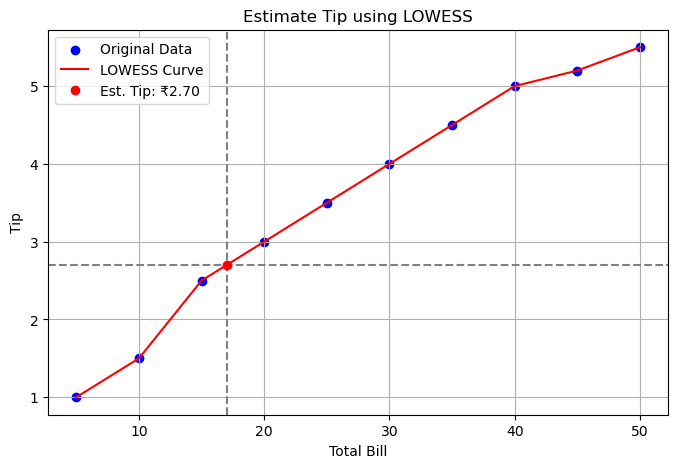

In [9]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulated data
x = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y = np.array([1, 1.5, 2.5, 3, 3.5, 4, 4.5, 5, 5.2, 5.5])

# Apply LOWESS
lowess_result = sm.nonparametric.lowess(endog=y, exog=x, frac=0.3)
x_smooth = lowess_result[:, 0]
y_smooth = lowess_result[:, 1]

# 🎯 Step to estimate tip at total_bill = 17 using interpolation
bill_to_estimate = 17
estimated_tip = np.interp(bill_to_estimate, x_smooth, y_smooth)

print(f"Estimated tip for a total bill of {bill_to_estimate} is approximately ₹{estimated_tip:.2f}")

# Optional: Visualize
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Original Data', color='blue')
plt.plot(x_smooth, y_smooth, color='red', label='LOWESS Curve')
plt.axvline(bill_to_estimate, linestyle='--', color='gray')
plt.axhline(estimated_tip, linestyle='--', color='gray')
plt.plot(bill_to_estimate, estimated_tip, 'ro', label=f'Est. Tip: ₹{estimated_tip:.2f}')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Estimate Tip using LOWESS")
plt.legend()
plt.grid(True)
plt.show()


# Facial Recognition

In [15]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100)

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


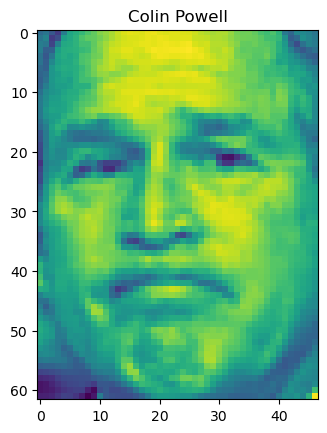

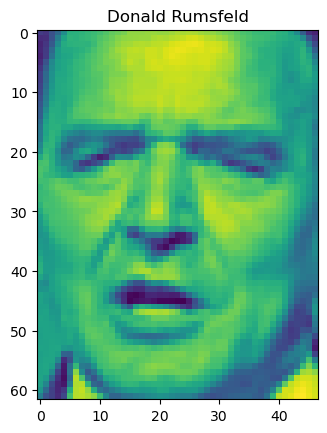

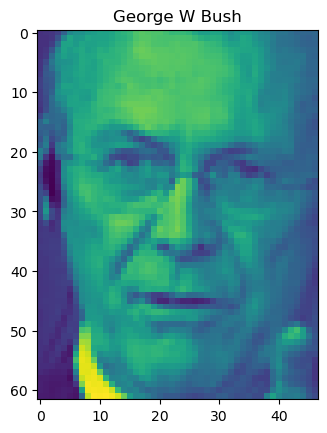

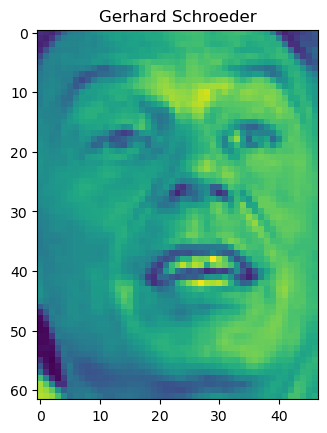

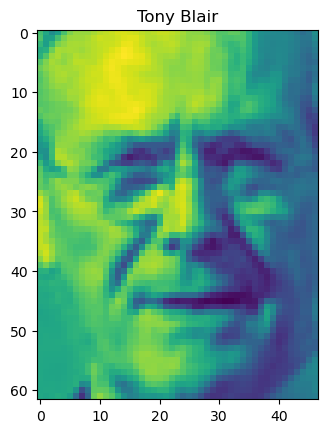

In [19]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(faces.images[i])
    plt.title(faces.target_names[i])
    plt.show()

In [41]:
import pandas as pd

df  = pd.DataFrame(faces.data)

df['labels'] = faces.target

balanced =  df.groupby('labels').head(100)

x = balanced.drop('labels',axis = 1).values
y = balanced['labels'].values

In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [42]:
from tensorflow.keras.utils import to_categorical

x= x/255.0
y= to_categorical(y)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)


In [44]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,activation='relu',input_shape = (x.shape[1],)))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

c:\Users\rames\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.fit(x_train,y_train,validation_data=[x_test,y_test],epochs=100,batch_size=20)

Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4316 - loss: 1.5667 - val_accuracy: 0.2500 - val_loss: 1.5902
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3982 - loss: 1.5617 - val_accuracy: 0.1900 - val_loss: 1.5883
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3808 - loss: 1.5586 - val_accuracy: 0.2800 - val_loss: 1.5841
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4507 - loss: 1.5568 - val_accuracy: 0.2300 - val_loss: 1.5823
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3796 - loss: 1.5574 - val_accuracy: 0.3100 - val_loss: 1.5762
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4147 - loss: 1.5500 - val_accuracy: 0.2300 - val_loss: 1.5786
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4035 - loss: 1.5405 - val_accuracy: 0.3000 - val_loss: 1.5705
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5293 - loss: 1.5289 - val_accuracy: 0.3500 - val_loss: 1.5

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

y_pred_cls =  y_pred.argmax(axis=1)
y_true_cls = y_test.argmax(axis=1)

print(confusion_matrix(y_true_cls,y_pred_cls))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[14  2  0  1  0]
 [ 1  5  1  2  4]
 [ 2  0 16  1  3]
 [ 0  4  3 12 10]
 [ 1  0  4  1 13]]


# Character Recognition

In [49]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [50]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [51]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([

    Dense(128,activation='relu',input_shape=(784,)),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')

])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\rames\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.fit(x_train,y_train,validation_split=0.8,epochs=40,batch_size=32)

Epoch 1/40


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9895 - loss: 0.0576 - val_accuracy: 0.9490 - val_loss: 0.7888
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9944 - loss: 0.0211 - val_accuracy: 0.9478 - val_loss: 0.7232
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9959 - loss: 0.0154 - val_accuracy: 0.9428 - val_loss: 0.9297
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9921 - loss: 0.0535 - val_accuracy: 0.9386 - val_loss: 0.8738
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0569 - val_accuracy: 0.9447 - val_loss: 0.8868
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9920 - loss: 0.0461 - val_accuracy: 0.9374 - val_loss: 0.7205
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9924 - loss: 0.0329 - val_accuracy: 0.9423 - val_loss: 0.8496
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9928 - loss: 0.0480 - val_accuracy: 0.9420 - val_

In [55]:
loss,accuracy = model.evaluate(x_test,y_test)

print (accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9421 - loss: 1.1467
94.73999738693237


In [57]:
from tensorflow.keras.preprocessing import image
import numpy as np

path = '4.jpeg'

img = image.load_img(path,color_mode='grayscale',target_size = (28,28))
img_arr = image.img_to_array(img)
img_arr /=255
img_arr = img_arr.reshape(1,784)

pred = model.predict(img_arr)

print(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
8


# Spam Mail

In [58]:
# Sample dataset: list of (email content, label)
emails = [
    "Win money now",               # spam
    "Limited time offer",          # spam
    "Meeting at 3pm today",        # not spam
    "Get rich quick scheme",       # spam
    "Important update on project", # not spam
    "Cheap loans available",       # spam
    "Let’s catch up over coffee",  # not spam
    "Congratulations! You won!",   # spam
    "Lunch at 1?",                 # not spam
    "Exclusive deal just for you", # spam
]

# Labels: 1 for spam, 0 for not spam
labels = [1, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [60]:
vec = CountVectorizer()
X = vec.fit_transform(emails)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,labels,train_size=0.8)

In [62]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [63]:
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.5


In [64]:
new_email = ["Your loan is approved"]
nev= vec.transform(new_email)

pred = clf.predict(nev)

print("Spam" if pred[0] == 1 else "Ham")

Spam


# Decision Tree Classifier

In [65]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
from sklearn.metrics import accuracy_score

y_pred= clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

1.0


In [75]:
new_flower = [[5.1, 3.3, 1.7, 0.5]]  # sepal length, sepal width, petal length, petal width
predicted_class = clf.predict(new_flower)
print("Predicted class:", predicted_class[0])
print("Predicted flower:", iris.target_names[predicted_class[0]])


Predicted class: 0
Predicted flower: setosa


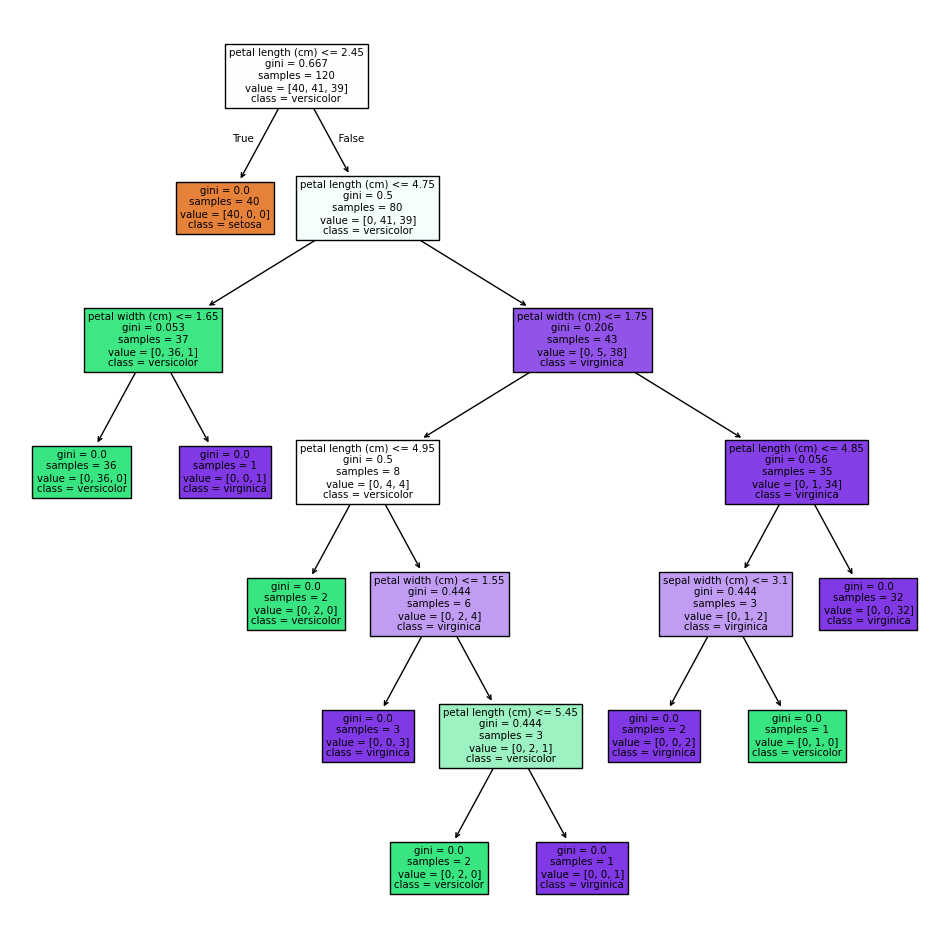

In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 12))
plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

# Sentiment Analysis using Random Forest 

In [94]:
# Step 1: Expanded dataset
texts = [
    "I love this product",
    "This is the best thing ever",
    "Absolutely amazing experience",
    "I hate this",
    "Worst service ever",
    "Very bad and disappointing",
    "I am extremely happy with this",
    "Not satisfied at all",
    "Great value for money",
    "Terrible and horrible",
    "I absolutely loved it",
    "This was awful",
    "Not happy with the quality",
    "Superb quality and great design",
    "Disgusting experience and waste of money",
]

labels = [
    1, 1, 1,   # positive
    0, 0, 0,   # negative
    1, 0, 1, 0,  # mixed
    1, 0, 0, 1, 0  # extra examples
]

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

x = vec.fit_transform(texts)

In [96]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =  train_test_split(x,labels,train_size=0.7,random_state=42)

In [97]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=42)

clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [98]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)

print(100*accuracy_score(y_test,y_pred))

60.0


In [99]:
new_texts = ["I absolutely loved it", "This was awful"]
new_X = vec.transform(new_texts)

predictions = clf.predict(new_X)

for text, label in zip(new_texts, predictions):
    print(f"{text} → {'Positive' if label == 1 else 'Negative'}")


I absolutely loved it → Positive
This was awful → Negative


# clustering

c:\Users\rames\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


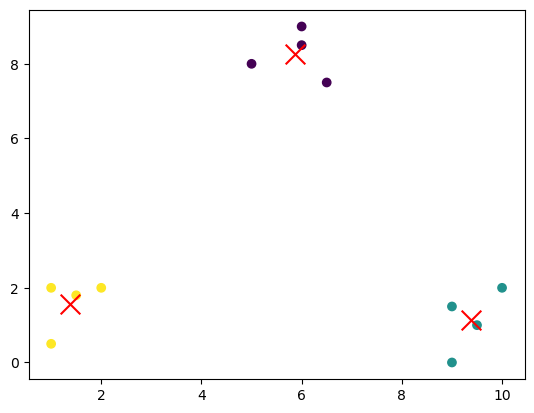

In [101]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample 2D data
X = np.array([
    [1, 2], [1.5, 1.8], [2, 2],         # Cluster 1
    [5, 8], [6, 9], [6.5, 7.5],         # Cluster 2
    [9, 0], [10, 2], [9.5, 1],          # Cluster 3
    [1, 0.5], [6, 8.5], [9, 1.5]        # Extra close points
])

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels  = kmeans.labels_

plt.scatter(X[:,0],X[:,1],c=labels,marker='o',label = 'points')
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200,marker='x',label="centroid")

plt.show()

# HMM

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm

# Step 1: Sample dataset
data = [
    ("buy now limited offer", 1),     # spam
    ("free deal just for you", 1),    # spam
    ("project meeting schedule", 0),  # ham
    ("update on your assignment", 0), # ham
    ("discount offer exclusive", 1),  # spam
    ("team lunch tomorrow", 0),       # ham
]

# Step 2: Prepare data
emails, labels = zip(*data)
df = pd.DataFrame({'text': emails, 'label': labels})

# Tokenize emails into words
df['tokens'] = df['text'].apply(lambda x: x.lower().split())

# Flatten all words and encode
all_words = [word for tokens in df['tokens'] for word in tokens]
le = LabelEncoder()
le.fit(all_words)

# Encode tokens to integers
df['encoded'] = df['tokens'].apply(lambda tokens: le.transform(tokens))

# Step 3: Separate spam and ham sequences
spam_seqs = df[df['label'] == 1]['encoded'].tolist()
ham_seqs = df[df['label'] == 0]['encoded'].tolist()

# Format for hmmlearn
def format_sequences(seqs):
    lengths = [len(seq) for seq in seqs]
    X = np.concatenate([np.array(seq) for seq in seqs]).reshape(-1, 1)
    return X, lengths

X_spam, len_spam = format_sequences(spam_seqs)
X_ham, len_ham = format_sequences(ham_seqs)

# Step 4: Train HMMs
model_spam = hmm.MultinomialHMM(n_components=2, random_state=0)
model_ham = hmm.MultinomialHMM(n_components=2, random_state=0)

model_spam.fit(X_spam, len_spam)
model_ham.fit(X_ham, len_ham)

# Step 5: Predict a new email
test_email = "exclusive offer just for you"
test_tokens = test_email.lower().split()
test_encoded = le.transform(test_tokens).reshape(-1, 1)

score_spam = model_spam.score(test_encoded)
score_ham = model_ham.score(test_encoded)

print(f"Spam score: {score_spam:.2f}")
print(f"Ham score: {score_ham:.2f}")

if score_spam > score_ham:
    print("🔴 Prediction: SPAM")
else:
    print("🟢 Prediction: HAM")


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Spam score: 0.00
Ham score: -0.00
🔴 Prediction: SPAM


In [102]:
from hmmlearn import hmm 
import numpy as np

In [103]:
# Activity codes: Walk=0, Shop=1, Clean=2
obs_seq = np.array([[0], [1], [2], [1], [0], [0], [2]]).astype(int)  # Observed over 7 days


In [104]:
model = hmm.MultinomialHMM(n_components=2,n_iter=100,random_state=42)
model.fit(obs_seq)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


MultinomialHMM(n_components=2, n_iter=100,
               n_trials=array([0, 1, 2, 1, 0, 0, 2]),
               random_state=RandomState(MT19937) at 0x22490C77840)

In [105]:
print(model.predict(obs_seq))

[1 0 0 0 0 0 0]


# Bayesian Network

In [106]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.read_csv('./heart.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [123]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [108]:
from pgmpy.models import DiscreteBayesianNetwork

model = DiscreteBayesianNetwork([
    ('age','fbs'),('age','trestbps'),('sex','trestbps'),('exang','trestbps'),('trestbps','target')
])

In [111]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(df,estimator= MaximumLikelihoodEstimator)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'age': 'N', 'sex': 'N', 'cp': 'N', 'trestbps': 'N', 'chol': 'N', 'fbs': 'N', 'restecg': 'N', 'thalach': 'N', 'exang': 'N', 'oldpeak': 'N', 'slope': 'N', 'ca': 'N', 'thal': 'N', 'target': 'N'}


In [112]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [132]:
test=  {'age': 76, 'sex': 1, 'trestbps': 170}


In [133]:
result = infer.query(variables=['target'], evidence=test)
print(result)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7333 |
+-----------+---------------+
| target(1) |        0.2667 |
+-----------+---------------+


# Naive Bayes


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Create or Load Data
# Replace this with pd.read_csv('heart.csv') if you have the real dataset
data = pd.DataFrame({
    'age': [63, 37, 41, 56, 57, 60, 62, 54],
    'sex': [1, 1, 0, 1, 0, 1, 0, 1],
    'chol': [233, 250, 204, 236, 354, 300, 210, 198],
    'exang': [0, 1, 0, 1, 0, 1, 0, 0],  # exercise-induced angina
    'target': [1, 1, 1, 1, 0, 0, 1, 0]  # 1 = has heart disease
})

# Step 2: Split features and label
X = data.drop('target', axis=1)  # input features
y = data['target']               # output labels

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Predict for a New Patient
# Format: age, sex, chol, exang
new_patient = [[55, 1, 250, 0]]
prediction = model.predict(new_patient)
print("\nNew Patient Prediction (1=Heart Disease, 0=No Disease):", prediction[0])


Confusion Matrix:
 [[0 1]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


New Patient Prediction (1=Heart Disease, 0=No Disease): 0


c:\Users\rames\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rames\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rames\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rames\anaconda3\Lib\site-packag

# KNN 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Create a mock dataset
data = pd.DataFrame({
    'GRE': [320, 310, 305, 330, 299, 340, 315, 280],
    'GPA': [3.5, 3.0, 2.9, 3.8, 2.5, 4.0, 3.3, 2.2],
    'Research': [1, 0, 1, 1, 0, 1, 0, 0],
    'Admitted': [1, 0, 0, 1, 0, 1, 1, 0]  # Target
})

# Step 2: Separate features and target
X = data.drop('Admitted', axis=1)  # GRE, GPA, Research
y = data['Admitted']              # Admitted or not

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Step 4: Create and Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Predict for a new student
# Format: GRE, GPA, Research
new_student = [[315, 3.4, 1]]
prediction = knn.predict(new_student)
print("\nPrediction for New Student (1=Admitted, 0=Not Admitted):", prediction[0])


Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Prediction for New Student (1=Admitted, 0=Not Admitted): 1


c:\Users\rames\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\rames\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
